## Learn the Basicのコード

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda
from torchvision.io import decode_image


### テンソル

In [3]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [4]:
np_array = np.array(data)
# numpy -> tensor
x_np = torch.from_numpy(np_array)
display(np_array)
display(x_np)

array([[1, 2],
       [3, 4]])

tensor([[1, 2],
        [3, 4]])

In [5]:
#　xx_likeで引数に変数を入れると、その引数の型やサイズが引き継がれる
x_ones = torch.ones_like(x_data)
print(f'Ones tensor: \n {x_ones} \n')

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f'Random Trnsor: \n {x_rand} \n')

Ones tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Trnsor: 
 tensor([[0.6702, 0.6123],
        [0.8468, 0.8504]]) 



In [6]:
# サイズを明示的に渡すことも可能。(タプルで)
shape=(2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f'Random Tensor: \n {rand_tensor} \n')
print(f'Ones Tensor: \n {ones_tensor} \n')
print(f'Zeros Tensor: \n {zeros_tensor} \n')

Random Tensor: 
 tensor([[0.8407, 0.7265, 0.7751],
        [0.3446, 0.0265, 0.1332]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



In [7]:
# tensor型の情報を確認
tensor = torch.rand(3,4)
print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tendor: {tensor.dtype}')
print(f'Device tensor is stored on: {tensor.device}')

Shape of tensor: torch.Size([3, 4])
Datatype of tendor: torch.float32
Device tensor is stored on: cpu


In [8]:
# We move our tensor to the current accelerator if available
# これはエラーになります。理由は、PyTorchのtorchモジュールには「accelerator」という属性（メソッドやクラス）は存在しないためです。
# 以前は一部の環境や拡張ライブラリで「accelerator」というAPIがあったかもしれませんが、公式のPyTorch本体にはそのような機能はありません。
# 現在、PyTorchでデバイス（CPU/GPU）を判定・移動するには下記のようにtorch.cudaを使います。

if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    tensor = tensor.to('cpu')
    print(f"Using CPU")


Using GPU: NVIDIA RTX A6000


In [9]:
# numpyのようなインデックス操作も可能
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [10]:
# テンソルの結合
t1 = torch.cat([tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.]])


In [11]:
# 算術演算
# @ でも matmul メソッドでも対応可能
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

# inplace表記でも可
y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# * でも mul メソッドでも対応可能
z1 = tensor * tensor
z2 = tensor.mul(tensor)

# inplace表記でも可
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

print(f'tensor: {tensor} \n')
print(f"y1: {y1} \n")
print(f"y2: {y2} \n")
print(f"y3: {y3} \n")
print(f"z1: {z1} \n")
print(f"z2: {z2} \n")
print(f"z3: {z3} \n")

tensor: tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

y1: tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

y2: tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

y3: tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

z1: tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

z2: tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

z3: tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 



In [12]:
# tensorを集計するメソッドが存在
# 一方で、itemメソッドを用いることで、scalarに変換できる
agg = tensor.sum()
agg_item = agg.item()
print(f'agg: {agg} {type(agg)} \n')
print(f'agg_item: {agg_item} {type(agg_item)} \n')

agg: 12.0 <class 'torch.Tensor'> 

agg_item: 12.0 <class 'float'> 



In [13]:
# インプレース操作は新しい変数を作成する必要がないため、メモリ効率が良い一方で、いくつか問題が発生する可能性があるため非奨励
print(f'tensor: {tensor} \n')
tensor.add_(5)
print(f'tensor: {tensor} \n')

tensor: tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor: tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]]) 



In [14]:
# tensorとnumpy間で変換を行うとき、
# tensorとnumpyの変換
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [15]:
# numpyとtensorの変換
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


### データセットとデータローダー

In [16]:
training_data = datasets.FashionMNIST(
    root='/share/dtu_drone_tutorial',
    train=True,
    download=False,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='/share/dtu_drone_tutorial',
    train=False,
    download=False,
    transform=ToTensor()
)

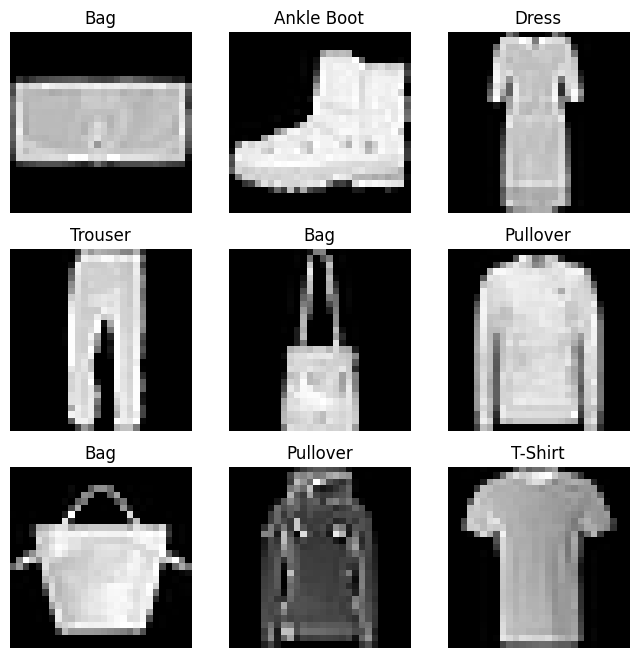

In [17]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [18]:
class CustomDataset(Dataset):
    def __init__(self, annotations_file, image_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = image_dir
        self.transform = transform
        self.target_transform = target_transform

    # インスタンス化する時に一度だけ読みだされるメソッド
    def __len__(self):
        return len(self.img_labels)
    
    # 呼び出された時に実行されるメソッド
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        # 画像をtensor型で出力
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]

        # 学習データや教師データに対して、前処理を施す(存在する場合)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label



In [19]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

for X, y in test_dataloader:
    print(f'Shape of X [N, C, H, W]: {X.shape}')
    print(f'Shape of y: {y.shape}, {y.dtype}')
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]), torch.int64


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


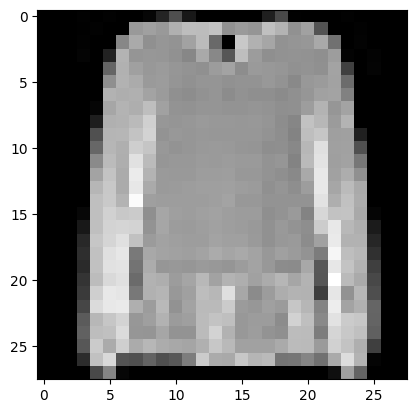

Label: 6


In [20]:
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {label}')

### Transforms

In [21]:
ds = datasets.FashionMNIST(
    root='/share/dtu_drone_tutorial',
    train=True,
    download=True,
    # PIL image or numpy arrayをtensorに変換
    transform=ToTensor(), 
    # 教師データをone-hotエンコーディングに変換
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

### Build the Neural Network

In [22]:
device = torch.cuda.current_device() if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using 0 device


In [23]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# GPUにメモリを移行
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [24]:
# 適当な値を入力として、未学習CNNモデルに通して、出力を確認
X = torch.rand(1,28,28, device=device)
logits = model(X)

pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f'Predicted class: {y_pred}')

Predicted class: tensor([3], device='cuda:0')


In [25]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [27]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [ ]:
# 画像を一列に変換して、全結合層を通す
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


#### ReLUとは

ReLUは線形整流関数とも呼ばれ、以下の数式で表されます：

**ReLU(x) = max(0, x)**

つまり：
- 入力が正の値（0より大きい）場合：そのまま出力
- 入力が0以下の場合：0を出力

ノートブック内でも実際の動作例が示されています：

```564:568:analytical_skill_tutorial/pytorch_tutorial/learn_the_basic.ipynb
# 活性化関数に入れ込む
# ReLUは0以下の値を0に、0より大きい値はそのまま出力する
print(f'Before ReLU: {hidden1}\n\n')
hidden1 = nn.ReLU()(hidden1)
print(f'After ReLU: {hidden1}')
```

実際の出力結果：
- 負の値（-0.0047, -0.1205など）→ 0に変換
- 正の値（0.2588, 0.0252など）→ そのまま保持

##### ReLUの効果

##### 1. **非線形性の導入**
- ニューラルネットワークに非線形変換を加えることで、複雑なパターンを学習可能にします

##### 2. **スパース性（疎性）**
- 負の値を0にすることで、ネットワークの一部のニューロンを「無効化」
- より効率的な特徴表現が可能

##### 3. **生物学的妥当性**
- 人間の脳のニューロンの発火パターンに近い動作

#### メリット

##### 1. **計算効率の向上**
- 非常に簡単な計算（max演算のみ）
- sigmoid関数やtanh関数のような指数関数計算が不要

##### 2. **勾配消失問題の軽減**
- 正の値に対して勾配が1と一定
- 深いネットワークでも効率的な学習が可能

##### 3. **実装の簡単さ**
- プログラム実装が非常に簡単
- ハードウェア実装も容易

##### 4. **学習の高速化**
- 収束が早い
- 計算コストが低いため学習時間が短縮

#### デメリット

##### 1. **Dying ReLU問題**
- 一度負の値で「死んだ」ニューロンは0しか出力しなくなる
- 学習が進まなくなる可能性

##### 2. **出力の非対称性**
- 出力が0以上の値のみ
- データの分布が偏る可能性

##### 3. **勾配の不連続性**
- x=0で微分不可能
- 最適化アルゴリズムに影響を与える場合がある

##### 4. **負の入力情報の完全な損失**
- 負の値の情報が完全に失われる
- 一部の問題では情報損失が問題となる

#### 改良版のReLU

これらのデメリットを解決するため、以下のような改良版も開発されています：

- **Leaky ReLU**: 負の値に小さな勾配を持たせる
- **Parametric ReLU (PReLU)**: 負の部分の勾配を学習可能にする
- **ELU (Exponential Linear Unit)**: 負の値で指数関数を使用
- **Swish**: x * sigmoid(x)の形式

ReLUは深層学習の発展に重要な役割を果たした活性化関数で、現在でも多くのケースで標準的に使用されています。

In [ ]:
# 活性化関数に入れ込む
# ReLUは0以下の値を0に、0より大きい値はそのまま出力する
print(f'Before ReLU: {hidden1}\n\n')
hidden1 = nn.ReLU()(hidden1)
print(f'After ReLU: {hidden1}')

Before ReLU: tensor([[ 0.2588, -0.0047, -0.1205, -0.1289,  0.0252,  0.0708, -0.2035, -0.0960,
          0.3167, -0.7553,  0.0481,  0.3029, -0.1178, -0.6142, -0.1733,  0.0637,
          0.2303,  0.4961,  0.0610, -0.0241],
        [ 0.5321,  0.0616,  0.0560, -0.2100, -0.0860,  0.3696, -0.1038, -0.0330,
          0.0989, -0.4286,  0.1131,  0.5259, -0.0976, -0.1898, -0.1760, -0.0879,
          0.4917,  0.7206, -0.0968, -0.2876],
        [ 0.0054, -0.3401,  0.0933, -0.1857, -0.2322, -0.2683, -0.2901,  0.0672,
          0.3772, -0.2107, -0.1011,  0.1698, -0.1605, -0.1509,  0.0122,  0.0052,
          0.3058,  0.4073,  0.0245, -0.0758]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.2588, 0.0000, 0.0000, 0.0000, 0.0252, 0.0708, 0.0000, 0.0000, 0.3167,
         0.0000, 0.0481, 0.3029, 0.0000, 0.0000, 0.0000, 0.0637, 0.2303, 0.4961,
         0.0610, 0.0000],
        [0.5321, 0.0616, 0.0560, 0.0000, 0.0000, 0.3696, 0.0000, 0.0000, 0.0989,
         0.0000, 0.1131, 0.5259, 0.0000, 0.0000, 0.00

In [ ]:
# sequentialメソッドは、各モジュールを結合させて、一つのモデルとして扱うことができる
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
print(logits)
print(logits.size())

In [30]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(pred_probab)
print(pred_probab.size())

tensor([[0.1057, 0.0970, 0.0963, 0.1066, 0.0944, 0.1000, 0.0953, 0.1012, 0.1011,
         0.1024]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
torch.Size([1, 10])


In [31]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0097, -0.0149,  0.0082,  ...,  0.0257, -0.0339, -0.0141],
        [-0.0272,  0.0290,  0.0228,  ...,  0.0036,  0.0232, -0.0065]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0131, 0.0161], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0345, -0.0002,  0.0162,  ..., -0.0269,  0.0046,  0.0045],
        [-0.0239, -0.0327,  0.0318,  ..., -0.0321, -0.0248, -0.0344]],
       device='cuda:0', grad_fn=<Slic

#### Automatic Differentiation

In [32]:
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [33]:
print(f'Gradient functinon for z = {z.grad_fn}')
print(f'Gradient function for loss = {loss.grad_fn}')

Gradient functinon for z = <AddBackward0 object at 0x7ff9f840d040>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7ff9f840de80>


In [ ]:
# 逆誤差伝搬で求めた勾配を表示
# bachwardのタイミングで計算グラフに基づいて逆誤差伝搬を行う
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0356, 0.3125, 0.1389],
        [0.0356, 0.3125, 0.1389],
        [0.0356, 0.3125, 0.1389],
        [0.0356, 0.3125, 0.1389],
        [0.0356, 0.3125, 0.1389]])
tensor([0.0356, 0.3125, 0.1389])


In [ ]:
# 勾配計算は自動で行われる。
# 勾配計算を行わない場合は、no_grad()を指定する必要がある。
z = torch.matmul(x, w) + b
print(f"z is a tensor: {z.requires_grad}")

with torch.no_grad():
    z = torch.matmul(x, w) + b
print(f"z is a tensor: {z.requires_grad}")


z is a tensor: True
z is a tensor: False


In [ ]:
# detach関数を行うと、勾配計算が行われなくなる。
# GPU内にあるメモリを解放することができる。
z = torch.matmul(x, w) + b
print(z.requires_grad)

z_det = z.detach()
print(z_det.requires_grad)



True
False


##### **勾配の蓄積**を説明している重要なセル

##### 1. **初期設定**
- `torch.eye(4, 5)`：4×5の単位行列を作成
- `requires_grad=True`：勾配計算を有効化

##### 2. **勾配の蓄積現象**
- **First call**：初回の`backward()`で勾配が計算される
- **Second call**：**勾配が蓄積される**（2倍になっている）

##### 3. **勾配のリセット**
- `inp.grad.zero_()`：勾配を手動でゼロに初期化
- **Call after zeroing gradients**：元の値に戻る

##### **重要なポイント**

##### **勾配蓄積の仕組み**
PyTorchでは`backward()`を複数回呼ぶと：
- 勾配が**加算**される（上書きされない）
- これは学習ループで意図しない動作を引き起こす可能性

##### **`retain_graph=True`**
- 計算グラフを保持して複数回`backward()`可能にする
- 通常は自動で削除されるため必要

##### **実用的な意味**
学習ループでは毎回`optimizer.zero_grad()`で勾配をリセットする必要があることを示しています。

このセルはPyTorchの**自動微分システムの重要な特性**を理解するための教育的な例となっています。

In [ ]:
inp = torch.eye(4, 5, requires_grad=True)
out = (inp+1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")

# 同じ処理を行うと、勾配計算が蓄積される
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")

inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


### Optimization Loop

In [ ]:
training_data = datasets.FashionMNIST(
    root='/share/dtu_drone_tutorial',
    train=True,
    download=False,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='/share/dtu_drone_tutorial',
    train=False,
    download=False,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# モデルの定義
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [48]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # モデルに突っ込み、予測値を取得
        pred = model(X)
        # 正解データ(y)と予測値(pred)の誤差を計算
        loss = loss_fn(pred, y)

        # 予測誤差を逆伝搬し、各パラメータ(w, b)の勾配を計算
        loss.backward()
        # 勾配を用いてパラメータを更新
        optimizer.step()
        # 勾配をリセット(勾配情報をゼロにする)
        optimizer.zero_grad()

        # batch(64)の値の100回に1回、lossを表示
        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f'loss: {loss:>7f}  [{current:>5d}/{size:>5d}]')

def test_loop(dataloader, model, loss_fn):
    # モデルを評価モードに変換
    # ドロップアウトやバッチ正規化など、学習時に特定の処理を行うメソッドに関して、
    # 評価時には、それらの処理が行われないようにするもの。
    model.eval()
    # データセットのサイズを取得
    size = len(dataloader.dataset)
    # バッチの数を取得
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            # モデルに突っ込み、予測値を取得
            pred = model(X)
            # 正解データ(y)と予測値(pred)の誤差を計算
            test_loss += loss_fn(pred, y).item()
            # 予測値と正解データとで、正解した数を数える
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # 平均誤差を計算
    test_loss /= num_batches
    # 正解率を計算
    correct /= size
    # 結果を表示
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')



In [50]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f'Epoch {t+1}\n-----------------------')
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-----------------------
loss: 2.302622  [   64/60000]
loss: 2.284015  [ 6464/60000]
loss: 2.274376  [12864/60000]
loss: 2.262674  [19264/60000]
loss: 2.235325  [25664/60000]
loss: 2.217868  [32064/60000]
loss: 2.217337  [38464/60000]
loss: 2.188179  [44864/60000]
loss: 2.180461  [51264/60000]
loss: 2.150911  [57664/60000]
Test Error: 
 Accuracy: 44.4%, Avg loss: 2.142569 

Epoch 2
-----------------------
loss: 2.154382  [   64/60000]
loss: 2.136089  [ 6464/60000]
loss: 2.084347  [12864/60000]
loss: 2.098646  [19264/60000]
loss: 2.032386  [25664/60000]
loss: 1.982090  [32064/60000]
loss: 2.007234  [38464/60000]
loss: 1.924778  [44864/60000]
loss: 1.928043  [51264/60000]
loss: 1.865826  [57664/60000]
Test Error: 
 Accuracy: 51.4%, Avg loss: 1.854416 

Epoch 3
-----------------------
loss: 1.884284  [   64/60000]
loss: 1.849306  [ 6464/60000]
loss: 1.739589  [12864/60000]
loss: 1.786464  [19264/60000]
loss: 1.669716  [25664/60000]
loss: 1.629572  [32064/60000]
loss: 1.657552  [384

In [88]:
# dataloaderの中身は、(batch, (image, label), channel, height, width))の順で格納
print(f"\tbatch数: {len(train_dataloader.dataset)}\n\
        (image, label): {len(train_dataloader.dataset[0])}\n\n\
        [image]\n\
        channel: {len(train_dataloader.dataset[0][0])}\n\
        height: {len(train_dataloader.dataset[0][0][0])}\n\
        width: {len(train_dataloader.dataset[0][0][0][0])}\n\n\
        [label]\n\
        {train_dataloader.dataset[0][1]}, {train_dataloader.dataset[1][1]}, {train_dataloader.dataset[3][1]}")


	batch数: 60000
        (image, label): 2

        [image]
        channel: 1
        height: 28
        width: 28

        [label]
        9, 0, 3


### Save, Load and Use Model